In [ ]:
#DATA COLLECTION AND PREPROCESSING PHASE










In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
#Loading Data
data=pd.read_csv("data.csv")
data_og=data.copy()
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#Data Overview
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


c:\Users\YASH\Desktop\VIT\SmartBridge ML Course\Project\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


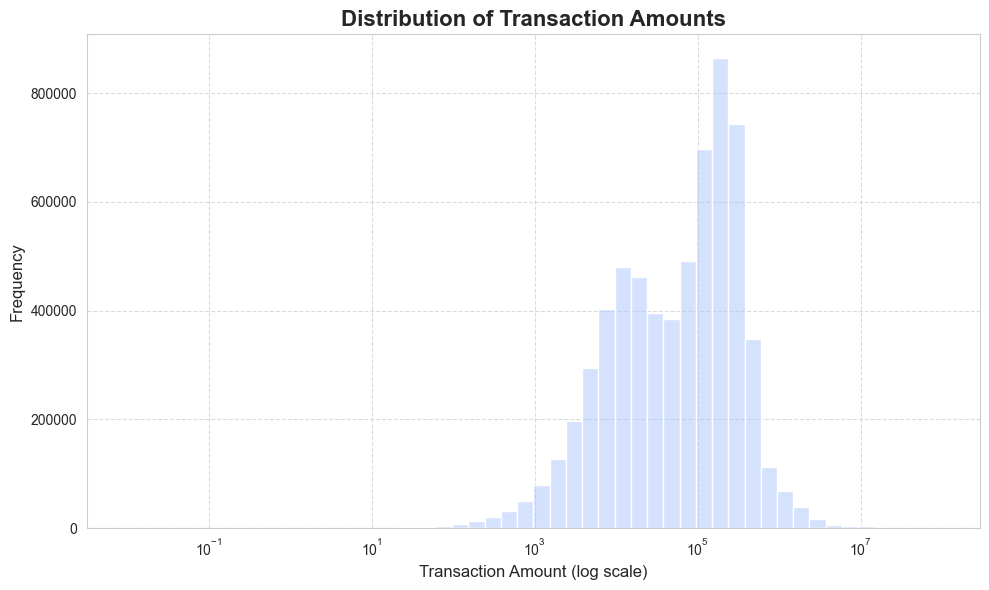

c:\Users\YASH\Desktop\VIT\SmartBridge ML Course\Project\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


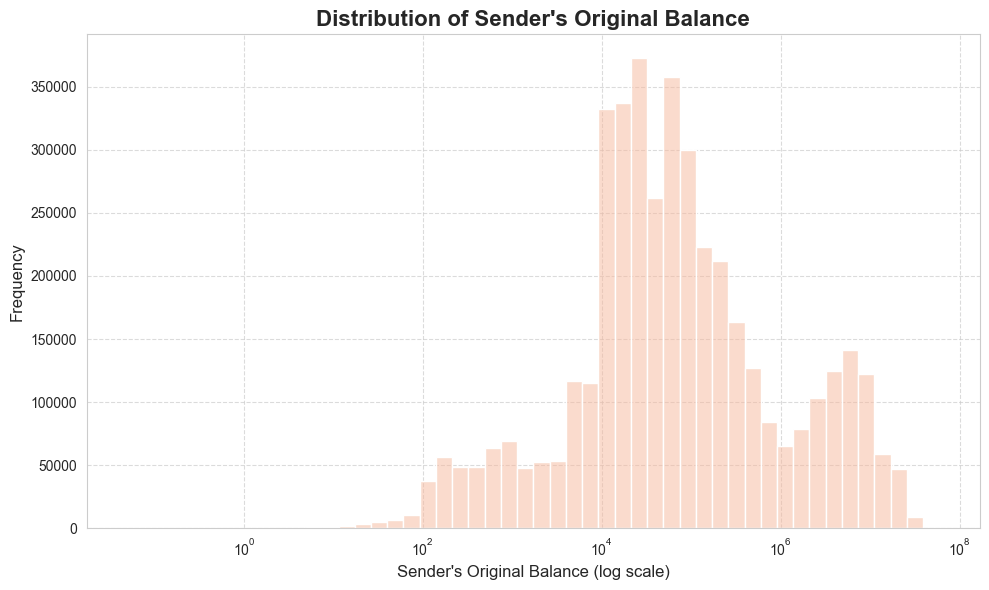

In [5]:
#Univariate Analysis
sns.set_style('whitegrid')
palette = sns.color_palette('coolwarm', 2)

plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=50, log_scale=True, color=palette[0], kde=True)
plt.title('Distribution of Transaction Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amount (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['oldbalanceOrg'], bins=50, log_scale=True, color=palette[1], kde=True)
plt.title("Distribution of Sender's Original Balance", fontsize=16, fontweight='bold')
plt.xlabel("Sender's Original Balance (log scale)", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

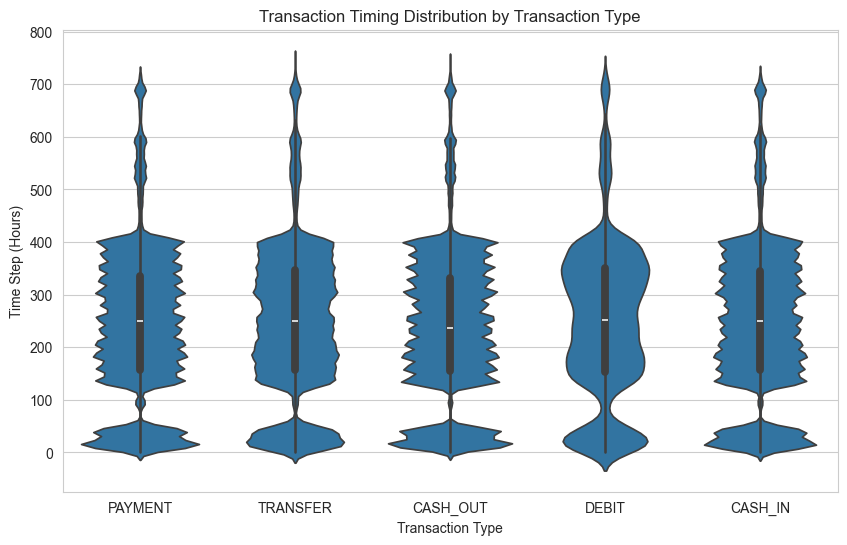

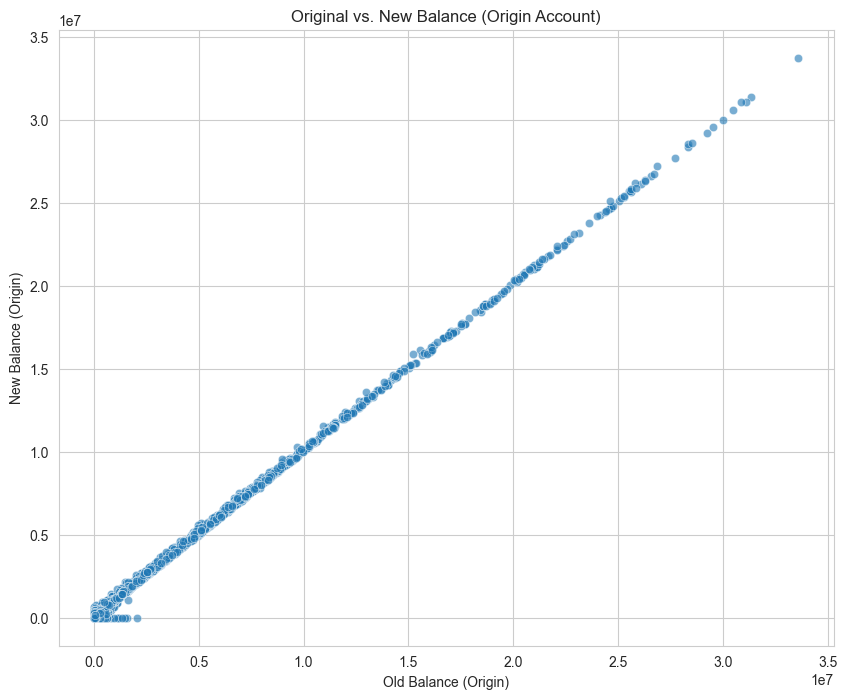

In [6]:
#Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(x="type", y="step", data=data)
plt.title("Transaction Timing Distribution by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Time Step (Hours)")
plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="oldbalanceOrg", 
    y="newbalanceOrig", 
    data=data.sample(10000, random_state=42),
    alpha=0.6
)
plt.title("Original vs. New Balance (Origin Account)")
plt.xlabel("Old Balance (Origin)")
plt.ylabel("New Balance (Origin)")
plt.show()



<Figure size 1200x1000 with 0 Axes>

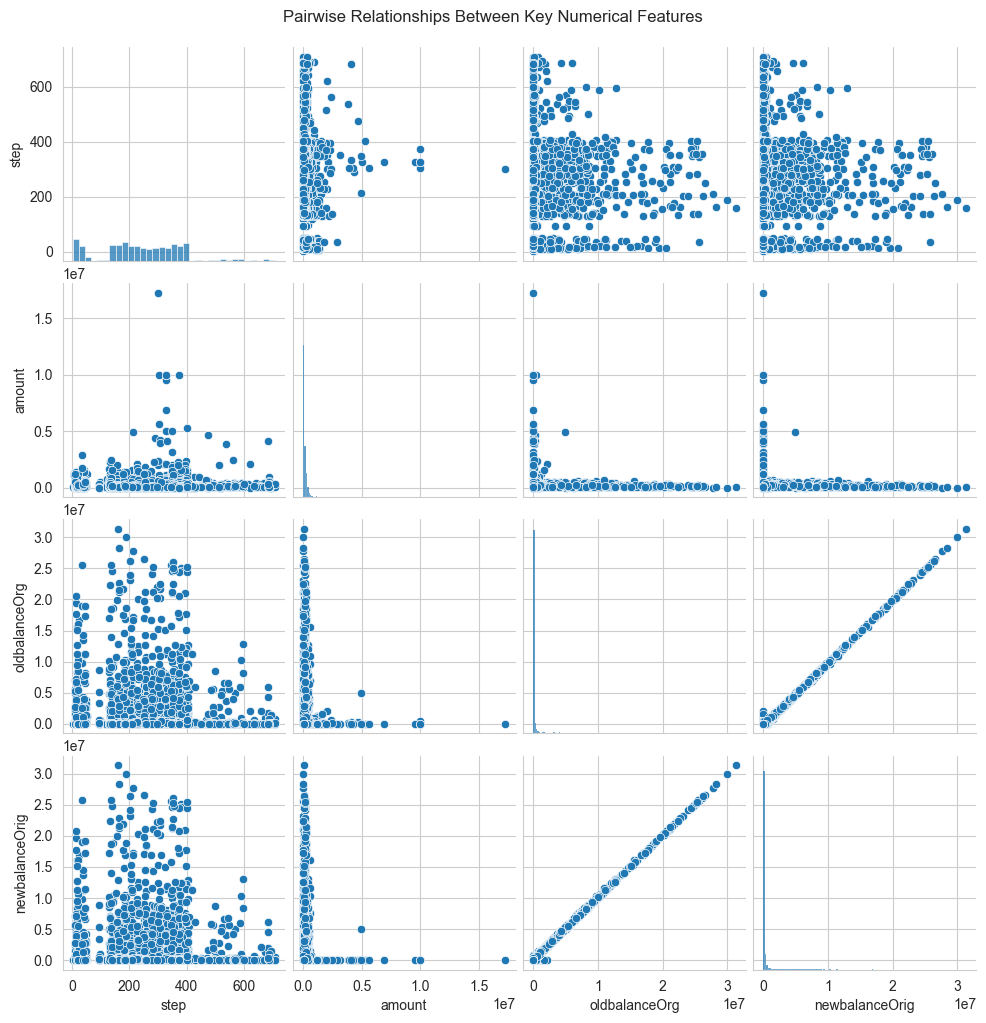

In [7]:
#Multivariate Analysis
plt.figure(figsize=(12, 10))
sns.pairplot(data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].sample(5000,random_state=42))
plt.suptitle('Pairwise Relationships Between Key Numerical Features', y=1.02)
plt.show()

In [8]:
#Anomalies/Outliers
"Due to the extremely wide distribution and heavy-tailed nature of financial transaction data in this dataset, traditional outlier detection methods are not effective. The data spans several orders of magnitude (e.g., transaction amounts range from $0 to $92+ million), making it difficult to distinguish between legitimate large transactions and true anomalies using standard statistical methods."

'Due to the extremely wide distribution and heavy-tailed nature of financial transaction data in this dataset, traditional outlier detection methods are not effective. The data spans several orders of magnitude (e.g., transaction amounts range from $0 to $92+ million), making it difficult to distinguish between legitimate large transactions and true anomalies using standard statistical methods.'

In [9]:
#Handling Missing Data (There isnt any missing data)
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#Data Transformation (Next 3 Cells)

In [5]:
df_clean = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df_clean.columns.tolist()

['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

In [6]:
df_encoded = pd.get_dummies(df_clean, columns=['type'], prefix='type')
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [7]:
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,7.318703e-17,-1.829676e-17,-1.829676e-17,1.343668e-17,1.143547e-17,-6.861284e-18,1.629555e-17,1.029193e-17,-1.515200e-17,1.944031e-17,1.458023e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.703042e+00,-2.978545e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,-5.309652e-01,-7.364839e-01,-8.095965e-02,-7.147779e-01,-3.023452e-01
25%,-6.140381e-01,-2.756812e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,-5.309652e-01,-7.364839e-01,-8.095965e-02,-7.147779e-01,-3.023452e-01
50%,-3.089430e-02,-1.738653e-01,-2.837972e-01,-2.924417e-01,-2.847734e-01,-2.749863e-01,-5.309652e-01,-7.364839e-01,-8.095965e-02,-7.147779e-01,-3.023452e-01
75%,6.435853e-01,4.779197e-02,-2.515606e-01,-2.431065e-01,-4.638324e-02,-3.077931e-02,-5.309652e-01,1.357803e+00,-8.095965e-02,1.399036e+00,-3.023452e-01
max,3.510123e+00,1.527936e+02,2.034149e+01,1.666523e+01,1.044120e+02,9.660911e+01,1.883362e+00,1.357803e+00,1.235183e+01,1.399036e+00,3.307478e+00


In [ ]:
#MODEL DEVELOPMENT PHASE










In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# First, create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution in training: {y_train.value_counts()}")


Training set shape: (5090096, 11)
Test set shape: (1272524, 11)
Class distribution in training: isFraud
0    5083526
1       6570
Name: count, dtype: int64


In [19]:
# Random Forest Implementation
rf_clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100
)

rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

print("=== RANDOM FOREST EVALUATION ===")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, rf_y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("\n" + "="*50 + "\n")


=== RANDOM FOREST EVALUATION ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9997

Confusion Matrix:
[[1270859      22]
 [    357    1286]]




In [18]:
# Decision Tree Implementation
dt_clf = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    criterion='gini'
)

dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

print("=== DECISION TREE EVALUATION ===")
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, dt_y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))
print("\n" + "="*50 + "\n")


=== DECISION TREE EVALUATION ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.89      0.87      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9997

Confusion Matrix:
[[1270706     175]
 [    212    1431]]




In [17]:
# KNN Implementation
knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=2
)

knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

print("=== K-NEAREST NEIGHBORS EVALUATION ===")
print("Classification Report:")
print(classification_report(y_test, knn_y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, knn_y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))
print("\n" + "="*50 + "\n")


=== K-NEAREST NEIGHBORS EVALUATION ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.67      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9995

Confusion Matrix:
[[1270819      62]
 [    539    1104]]




In [ ]:
# Gradient Boosting Implementation
gb_clf = GradientBoostingClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print("=== GRADIENT BOOSTING EVALUATION ===")
print("Classification Report:")
print(classification_report(y_test, gb_y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, gb_y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))
print("\n" + "="*50 + "\n")

=== GRADIENT BOOSTING EVALUATION ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.89      0.62      0.73      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.81      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9994

Confusion Matrix:
[[1270754     127]
 [    623    1020]]




In [9]:
#MODEL OPTIMIZATION AND TUNING PHASE

from sklearn.model_selection import RandomizedSearchCV

# Sample 30% of the training data for faster tuning
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]







In [10]:
#Random Forest Fine Tuning

# Define a small parameter distribution
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'class_weight': ['balanced']
}

rf_clf = RandomForestClassifier(random_state=42)

print("Tuning Random Forest with RandomizedSearchCV on a sample...")
rf_random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=4,
    scoring='f1', cv=2, n_jobs=1, verbose=1, random_state=42
)

rf_random_search.fit(X_train_sample, y_train_sample)

print("=== RANDOM FOREST OPTIMIZATION RESULTS ===")
print("Best Parameters:")
print(rf_random_search.best_params_)
print(f"Best Cross-Validation Score: {rf_random_search.best_score_:.4f}")

best_rf = rf_random_search.best_estimator_
rf_y_pred_tuned = best_rf.predict(X_test)

print("\nOptimized Random Forest Evaluation:")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred_tuned):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred_tuned))
print("\n" + "="*70 + "\n")


Tuning Random Forest with RandomizedSearchCV on a sample...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
=== RANDOM FOREST OPTIMIZATION RESULTS ===
Best Parameters:
{'n_estimators': 50, 'max_depth': None, 'class_weight': 'balanced'}
Best Cross-Validation Score: 0.8434

Optimized Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.76      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9997
Confusion Matrix:
[[1270856      25]
 [    400    1243]]




In [ ]:
# Decision Tree Fine Tuning

# Define a small parameter distribution
dt_param_dist = {
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', {0: 1, 1: 10}]
}

dt_clf = DecisionTreeClassifier(random_state=42)

print("Tuning Decision Tree with RandomizedSearchCV on a sample...")
dt_random_search = RandomizedSearchCV(
    dt_clf, param_distributions=dt_param_dist, n_iter=6, 
    scoring='f1', cv=2, n_jobs=1, verbose=1, random_state=42
)

dt_random_search.fit(X_train_sample, y_train_sample)

print("=== DECISION TREE OPTIMIZATION RESULTS ===")
print("Best Parameters:")
print(dt_random_search.best_params_)
print(f"Best Cross-Validation Score: {dt_random_search.best_score_:.4f}")

best_dt = dt_random_search.best_estimator_
dt_y_pred_tuned = best_dt.predict(X_test)

print("\nOptimized Decision Tree Evaluation:")
print("Classification Report:")
print(classification_report(y_test, dt_y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, dt_y_pred_tuned):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred_tuned))
print("\n" + "="*70 + "\n")


Tuning Decision Tree with RandomizedSearchCV on a sample...
Fitting 2 folds for each of 6 candidates, totalling 12 fits
=== DECISION TREE OPTIMIZATION RESULTS ===
Best Parameters:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'class_weight': {0: 1, 1: 10}}
Best Cross-Validation Score: 0.8260

Optimized Decision Tree Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.87      0.83      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.91      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9996
Confusion Matrix:
[[1270669     212]
 [    284    1359]]




In [12]:
# KNN Fine Tuning

# Define a small parameter distribution
knn_param_dist = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_clf = KNeighborsClassifier()

print("Tuning KNN with RandomizedSearchCV on a sample...")
knn_random_search = RandomizedSearchCV(
    knn_clf, param_distributions=knn_param_dist, n_iter=4,  
    scoring='f1', cv=2, n_jobs=1, verbose=1, random_state=42
)

knn_random_search.fit(X_train_sample, y_train_sample)

print("=== KNN OPTIMIZATION RESULTS ===")
print("Best Parameters:")
print(knn_random_search.best_params_)
print(f"Best Cross-Validation Score: {knn_random_search.best_score_:.4f}")

best_knn = knn_random_search.best_estimator_
knn_y_pred_tuned = best_knn.predict(X_test)

print("\nOptimized KNN Evaluation:")
print("Classification Report:")
print(classification_report(y_test, knn_y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred_tuned):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred_tuned))
print("\n" + "="*70 + "\n")



Tuning KNN with RandomizedSearchCV on a sample...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
=== KNN OPTIMIZATION RESULTS ===
Best Parameters:
{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
Best Cross-Validation Score: 0.7024

Optimized KNN Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.60      0.74      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.80      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9995
Confusion Matrix:
[[1270838      43]
 [    651     992]]




In [13]:
# Gradient Boosting Fine Tuning

# Define a small parameter distribution
gb_param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb_clf = GradientBoostingClassifier(random_state=42)

print("Tuning Gradient Boosting with RandomizedSearchCV on a sample...")
gb_random_search = RandomizedSearchCV(
    gb_clf, param_distributions=gb_param_dist, n_iter=4,
    scoring='f1', cv=2, n_jobs=1, verbose=1, random_state=42
)

gb_random_search.fit(X_train_sample, y_train_sample)

print("=== GRADIENT BOOSTING OPTIMIZATION RESULTS ===")
print("Best Parameters:")
print(gb_random_search.best_params_)
print(f"Best Cross-Validation Score: {gb_random_search.best_score_:.4f}")

best_gb = gb_random_search.best_estimator_
gb_y_pred_tuned = best_gb.predict(X_test)

print("\nOptimized Gradient Boosting Evaluation:")
print("Classification Report:")
print(classification_report(y_test, gb_y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, gb_y_pred_tuned):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred_tuned))
print("\n" + "="*70 + "\n")



Tuning Gradient Boosting with RandomizedSearchCV on a sample...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
=== GRADIENT BOOSTING OPTIMIZATION RESULTS ===
Best Parameters:
{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}
Best Cross-Validation Score: 0.6604

Optimized Gradient Boosting Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.84      0.61      0.71      1643

    accuracy                           1.00   1272524
   macro avg       0.92      0.81      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9993
Confusion Matrix:
[[1270684     197]
 [    633    1010]]




In [ ]:
#SAVING THE BEST MODEL







In [12]:
import pickle
filename="rf_model.pkl"
pickle.dump(best_rf,open(filename,'wb'))

In [13]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))